In [92]:
import numpy as np
import pandas as pd
import os
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [93]:
base_dir = os.path.dirname(os.path.abspath(sys.argv[1]))
file_path = os.path.join(base_dir, "..\Data\sobar-72.csv")  
raw_path = Path(file_path)
corrected_path = raw_path.resolve()
print("Base directory:", base_dir)
print("File path:", file_path)
print("corrected path:", corrected_path)
df = pd.read_csv(corrected_path)

Base directory: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Code
File path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Code\..\Data\sobar-72.csv
corrected path: C:\Users\serig\OneDrive - Université Côte d'Azur\2 éme année\projet Cancer\Risques-de-cancer-cervical\Data\sobar-72.csv


### Séparation du jeu de données

In [94]:
import numpy as np

# Charger le fichier
data = np.load("kfold_indices.npz", allow_pickle=True)

# Vérifier les clés disponibles
print("Clés disponibles :", data.files)

# Accéder aux indices pour un pli spécifique (ex: fold_1)
fold_1 = data["fold_1"].item()  # `.item()` pour récupérer le dictionnaire stocké

# Maintenant, accède aux indices de train et test
train_set = fold_1["train"]
test_set = fold_1["test"]

# Afficher les indices
print("Train:", train_set)
print("Test:", test_set)
# Maintenant on peut utiliser ces indices pour entraîner ou tester vos modèles

Clés disponibles : ['fold_1', 'fold_2', 'fold_3', 'fold_4']
Train: [ 1  2  3  6  7  8 11 13 14 15 16 17 19 20 21 23 24 25 26 27 29 30 32 33
 35 36 37 38 39 40 41 42 43 44 46 48 51 52 53 55 57 58 59 60 61 63 64 65
 66 67 68 69 70 71]
Test: [ 0  4  5  9 10 12 18 22 28 31 34 45 47 49 50 54 56 62]


### Données et variable cible

In [95]:
X = df.drop(["ca_cervix"], axis=1)
y=df["ca_cervix"]
X.shape
#y.shape

(72, 19)

# 1) Modéle arbre de décision

In [96]:
scores_tree = []

for i in range(1, 5):  # 4 folds: fold_1 à fold_4
    fold = data[f"fold_{i}"].item()  # Extraire le dictionnaire contenant "train" et "test"
    
    train_index = fold["train"]
    test_index = fold["test"]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Définir et entraîner le modèle
    model_tree = DecisionTreeClassifier(max_depth=5, random_state=42)  # Ajuste les hyperparamètres si nécessaire
    model_tree.fit(X_train, y_train)

    # Prédictions
    y_pred_tree = model_tree.predict(X_test)

    # Évaluation
    score_tree = accuracy_score(y_test, y_pred_tree)
    scores_tree.append(score_tree)

    print(f"Fold {i}: Accuracy = {score_tree:.4f}")

Fold 1: Accuracy = 0.8333
Fold 2: Accuracy = 0.7222
Fold 3: Accuracy = 0.8889
Fold 4: Accuracy = 0.7778


### Evaluation 

In [97]:
# Score moyen sur tous les folds
print(f"\nScore moyen: {np.mean(scores_tree)* 100:.2f}%")
print(classification_report(y_test, y_pred_tree))


Score moyen: 80.56%
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.67      0.40      0.50         5

    accuracy                           0.78        18
   macro avg       0.73      0.66      0.68        18
weighted avg       0.76      0.78      0.76        18



### Visualisation de l'arbre de décision

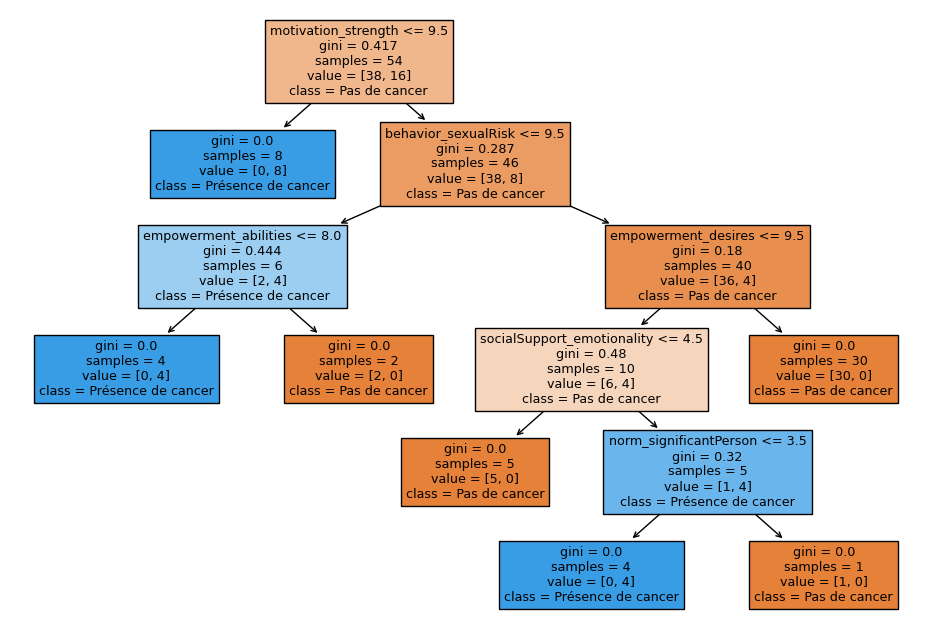

In [98]:
plt.figure(figsize=(12, 8))
plot_tree(model_tree, feature_names=X.columns, class_names=["Pas de cancer", "Présence de cancer"], filled=True)
plt.show()

### Interprétation de l'arbre de decision

# 2) Modéle Regression logistique

$\huge
p(y = 1 | x) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}}$

In [99]:
scores_logistique = []

for i in range(1, 5):  # 4 folds: fold_1 à fold_4
    fold = data[f"fold_{i}"].item()  # Extraire le dictionnaire contenant "train" et "test"
    
    train_index = fold["train"]
    test_index = fold["test"]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Définir et entraîner le modèle
    model_logistique = LogisticRegression(solver="saga",max_iter=2000)  # Augmenter les itérations
    model_logistique.fit(X_train, y_train)

    # Prédictions
    y_pred_logistique = model_logistique.predict(X_test)

    # Évaluation
    score_logistique = accuracy_score(y_test, y_pred_logistique)
    scores_logistique.append(score_tree)

    print(f"Fold {i}: Accuracy = {score_logistique:.4f}")

Fold 1: Accuracy = 0.8333
Fold 2: Accuracy = 0.8889
Fold 3: Accuracy = 0.9444
Fold 4: Accuracy = 0.9444


### Evaluation

In [100]:
# Score moyen sur tous les folds
print(f"\nScore moyen: {np.mean(scores_logistique)* 100:.2f}%")
# Rapport détaillé des performances (Précision, Rappel, F1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred_logistique))


Score moyen: 77.78%
Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18



### Interpretation des coefficients du modéle

In [101]:
coef = pd.DataFrame({"Feature": X.columns, "Coefficient": model_logistique.coef_[0]})
print(coef.sort_values(by="Coefficient", ascending=False))
# Un coefficient positif indique que la variable augmente la probabilité d'appartenir à la classe 1 "présence du cancer".
# Un coefficient négatif indique que la variable diminue cette probabilité

                       Feature  Coefficient
1              behavior_eating     0.653246
5         attitude_consistency     0.637452
15  socialSupport_instrumental     0.554603
0          behavior_sexualRisk     0.456789
12      motivation_willingness     0.327293
6         attitude_spontaneity     0.307200
9     perception_vulnerability     0.038127
7       norm_significantPerson     0.031744
13  socialSupport_emotionality    -0.115551
17       empowerment_abilities    -0.144825
8             norm_fulfillment    -0.188718
2      behavior_personalHygine    -0.195586
4         intention_commitment    -0.210200
3        intention_aggregation    -0.217514
11         motivation_strength    -0.290128
18         empowerment_desires    -0.423060
14  socialSupport_appreciation    -0.521360
16       empowerment_knowledge    -0.566625
10         perception_severity    -1.049831


# 3) Modèle SVM (Support Vector Machine)

In [102]:
scores_svm = []

for i in range(1, 5):  # 4 folds: fold_1 à fold_4
    fold = data[f"fold_{i}"].item()  # Extraire le dictionnaire contenant "train" et "test"
    
    train_index = fold["train"]
    test_index = fold["test"]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Définir et entraîner le modèle
    model_svm = SVC(kernel="linear", C=1.0,probability=True)  # "linear"    
    model_svm.fit(X_train, y_train)

    # Prédictions
    y_pred_svm = model_svm.predict(X_test)

    # Évaluation
    score_svm = accuracy_score(y_test, y_pred_svm)
    scores_svm.append(score_svm)

    print(f"Fold {i}: Accuracy = {score_svm:.4f}")

Fold 1: Accuracy = 0.9444
Fold 2: Accuracy = 0.9444
Fold 3: Accuracy = 0.9444
Fold 4: Accuracy = 0.9444


### Evaluation

In [103]:
# Score moyen sur tous les folds
print(f"\nScore moyen: {np.mean(scores_svm)* 100:.2f}%")
# Rapport détaillé des performances (Précision, Rappel, F1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred_svm))


Score moyen: 94.44%
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.83      1.00      0.91         5

    accuracy                           0.94        18
   macro avg       0.92      0.96      0.93        18
weighted avg       0.95      0.94      0.95        18



### Visualisation de la frontiére de decission SVM

# 4) Modéle K NN

### Description et justification de l'utilisation

### Intanciation et entrainement

In [104]:
scores_knn = []

for i in range(1, 5):  # 4 folds: fold_1 à fold_4
    fold = data[f"fold_{i}"].item()  # Extraire le dictionnaire contenant "train" et "test"
    
    train_index = fold["train"]
    test_index = fold["test"]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Définir et entraîner le modèle
    model_knn = KNeighborsClassifier(n_neighbors=9)    
    model_knn.fit(X_train, y_train)

    # Prédictions
    y_pred_knn = model_knn.predict(X_test)

    # Évaluation
    score_knn = accuracy_score(y_test, y_pred_knn)
    scores_knn.append(score_knn)

    print(f"Fold {i}: Accuracy = {score_knn:.4f}")

Fold 1: Accuracy = 0.7778
Fold 2: Accuracy = 0.8333
Fold 3: Accuracy = 0.7778
Fold 4: Accuracy = 0.9444


### Evaluation

In [105]:
# Score moyen sur tous les folds
print(f"\nScore moyen: {np.mean(scores_knn)* 100:.2f}%")
# Rapport détaillé des performances (Précision, Rappel, F1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))


Score moyen: 83.33%
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.83      1.00      0.91         5

    accuracy                           0.94        18
   macro avg       0.92      0.96      0.93        18
weighted avg       0.95      0.94      0.95        18



# 5) Modéle Naives Bayes

### Description de justification de l'utilisation

### Instanciation et entrainement

In [106]:
scores_NB = []

for i in range(1, 5):  # 4 folds: fold_1 à fold_4
    fold = data[f"fold_{i}"].item()  # Extraire le dictionnaire contenant "train" et "test"
    
    train_index = fold["train"]
    test_index = fold["test"]

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Définir et entraîner le modèle Naïve Bayes
    model_NB = GaussianNB()  # Utilise GaussianNB pour des données continues
    model_NB.fit(X_train, y_train)

    # Prédictions
    y_pred_NB = model_NB.predict(X_test)

    # Évaluation
    score_NB = accuracy_score(y_test, y_pred_NB)
    scores_NB.append(score_NB)

    print(f"Fold {i}: Accuracy = {score_NB:.4f}")


Fold 1: Accuracy = 0.8889
Fold 2: Accuracy = 0.8889
Fold 3: Accuracy = 0.8889
Fold 4: Accuracy = 0.9444


### Evaluation

In [107]:
# Score moyen sur tous les folds
print(f"\nScore moyen: {np.mean(scores_NB)* 100:.2f}%")
# Rapport détaillé des performances (Précision, Rappel, F1-score)
print("Rapport de classification :\n", classification_report(y_test, y_pred_NB))


Score moyen: 90.28%
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.83      1.00      0.91         5

    accuracy                           0.94        18
   macro avg       0.92      0.96      0.93        18
weighted avg       0.95      0.94      0.95        18



# Choix du meilleur modéle

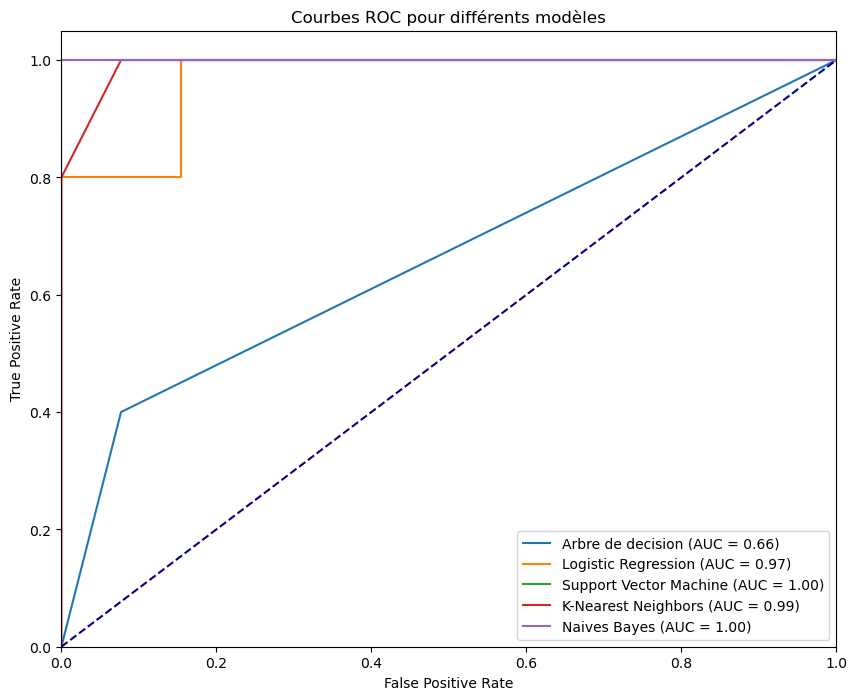

In [108]:
models = [
    ("Arbre de decision", model_tree),
    ("Logistic Regression", model_logistique),
    ("Support Vector Machine", model_svm),
    ("K-Nearest Neighbors", model_knn),
    ("Naives Bayes", model_NB)
]

# Binariser les étiquettes pour la classification binaire (si nécessaire)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Créer la figure pour afficher les courbes ROC
plt.figure(figsize=(10, 8))

# Boucle pour calculer et tracer les courbes ROC pour chaque modèle
for name, model in models:
    # Prédictions de probabilité
    y_prob = model.predict_proba(X_test)[:, 1]  # Utilise la probabilité de la classe positive
    
    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    
    # Calcul de l'aire sous la courbe (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la diagonale (AUC = 0.5, modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Ajouter des labels et la légende
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC pour différents modèles')
plt.legend(loc='lower right')

# Afficher la courbe
plt.show()